In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/saved_model/my_modelAR03_AN')

# Check its architecture
model.summary()

df = pd.read_csv("C:/Users/yanzh/Desktop/AN_data/AR03.csv")
time = df['time'].values
AN = df['ammonia nitrogen'].values
df

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_12 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

,time,ammonia nitrogen
0,0.000000,1.000000
1,0.002903,0.138302
2,0.005805,0.095218
3,0.008708,0.009048
4,0.011611,0.482981
...,...,...
284,0.986937,0.125377
285,0.989839,0.146919
286,0.993466,0.069367
287,0.996370,0.009048


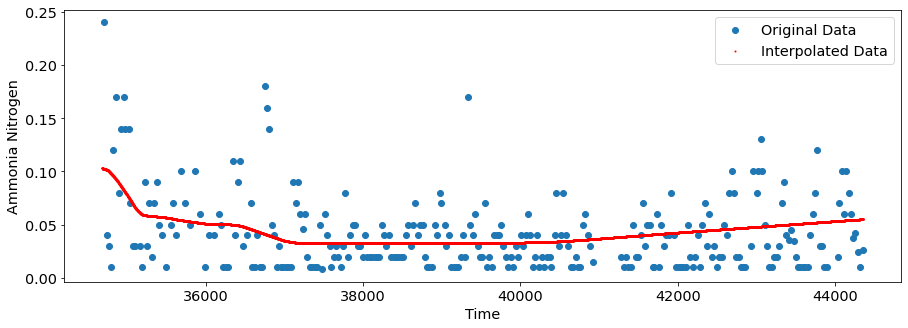

313/313 [==============================] - 0s 327us/step - loss: 7.5562e-17
['loss']


In [11]:
#Transform the normalized scale to real scale
AN_min = 0.0079
AN_max = 0.24
time_min = 34710.00 
time_max = 44356.37 

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(AN_max - AN_min) + AN_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, AN*(AN_max - AN_min) + AN_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Ammonia Nitrogen')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [12]:
interpolation = model.predict([0.043643369
,0.078578797
,0.084695089
,0.097342336
,0.103665959
,0.109989583
,0.116416872
,0.122533164
,0.128856788
,0.135180411
,0.141504035
,0.147827658
,0.166694863
,0.185665733
,0.646460923
,0.649467236
,0.652680881
,0.65579086
,0.659004504
,0.662114483
,0.665328128
,0.668541773
,0.671651751
,0.674865396
,0.677975375
,0.68118902
,0.848298546
,0.955592815
,0.958702793
,0.961916438
])
interpolation

array([[0.239049  ],
       [0.21098147],
       [0.20891736],
       [0.20121624],
       [0.19828604],
       [0.19532625],
       [0.1925067 ],
       [0.19000445],
       [0.18731667],
       [0.1850342 ],
       [0.18497433],
       [0.18491448],
       [0.1818668 ],
       [0.17089747],
       [0.12337966],
       [0.12410186],
       [0.12487388],
       [0.125621  ],
       [0.12639302],
       [0.12714013],
       [0.12791215],
       [0.12868416],
       [0.12943128],
       [0.1302033 ],
       [0.13095039],
       [0.13172242],
       [0.16983777],
       [0.19368045],
       [0.19437061],
       [0.19508378]], dtype=float32)